# Metehan Ayhan - Titanic Project with Deep Learning

Bu projenin amacı, Titanic veri seti kullanılarak kimlerin hayatta kalacağını tahmin eden deep learning modeli geliştirmektir. Data, Kaggle'dan alınmıştır. 

<img src='https://cdn.administrace.tv/2022/04/23/hd/fafa6cbdc39f4f273ababea9ed70ddee.jpg' width='500'>

### Data Dictionary
- survival: Hayatta kalma durumu. 0 = Hayır, 1 = Evet
- class: Bilet sınıfı. 1 = 1. sınıf, 2 = 2. sınıf, 3 = 3. sınıf
- sex: Cinsiyet.
- age: Yaş (yıllar olarak).
- sibsp: Titanic'te bulunan kardeş/spouse (eş) sayısı.
- parch: Titanic'te bulunan ebeveyn/çocuk sayısı.
- ticket: Bilet numarası.
- fare: Yolcu ücreti.
- cabin: Kabin numarası.
- embarked: Biniş limanı.
- C = Cherbourg, Q = Queenstown, S = Southampton

<a href='www.kaggle.com/competitions/titanic/overview/$citation' target=_blank>Data dosyasını burada bulabilirsiniz.</a>

### Import Packet


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
pd.set_option("display.max_columns",55)

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [7]:
ttest=pd.read_csv('ttest.csv')
ttrain=pd.read_csv('ttrain.csv')

In [8]:
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
ttest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Şimdi train ve testi birleştirelim ve yaptığımız veri önişleme ikisinde de ortak olsun.

In [11]:
df = pd.concat([ttrain, ttest], axis=0, ignore_index=True)

#### EDA - Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [14]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
553,554,1.0,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
1107,1108,NaN,3,"Mahon, Miss. Bridget Delia",female,NaN,0,0,330924,7.8792,NaN,Q
120,121,0.0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
1229,1230,NaN,2,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [16]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [17]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

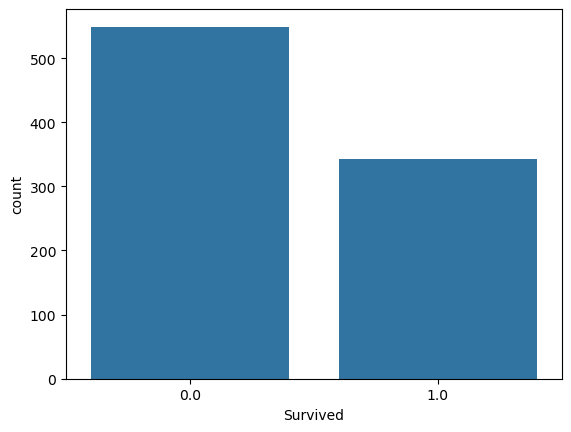

In [20]:
sns.countplot(x=df['Survived']);

### Data Preprocessing

Eksik verileri dolduralım

In [23]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

Label Encoding ve One-Hot Encoding yöntemlerini kullanarak kategorik verileri dönüştürelim.

In [25]:
df = pd.get_dummies(df, columns=['Embarked','Sex'], drop_first=True)
df = df.replace({True: 1, False: 0})

İsim sütununu çıkaralım

In [27]:
df.drop(columns=['Name'], inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1309 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked_Q   1309 non-null   int64  
 10  Embarked_S   1309 non-null   int64  
 11  Sex_male     1309 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 122.8+ KB


In [29]:
abs(df.corr(numeric_only=True)['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
Embarked_Q     0.003650
PassengerId    0.005007
SibSp          0.035322
Age            0.064910
Embarked_S     0.149683
Pclass         0.338481
Sex_male       0.543351
Name: Survived, dtype: float64

### Feature Engineers

In [31]:
df['Ticket_Length'] = df['Ticket'].str.len()
df['Ticket_Digit_Count'] = df['Ticket'].str.count(r'\d')

df['Cabin_Number'] = df['Cabin'].str.extract(r'(\d+)', expand=False).fillna(0).astype(int)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [32]:
df.drop(columns=['Ticket','Cabin'], inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Ticket_Length,Ticket_Digit_Count,Cabin_Number,FamilySize
0,1,0.0,3,22.0,1,0,7.2500,0,1,1,9,6,0,2
1,2,1.0,1,38.0,1,0,71.2833,0,0,0,8,5,85,2
2,3,1.0,3,26.0,0,0,7.9250,0,1,0,16,8,0,1
3,4,1.0,1,35.0,1,0,53.1000,0,1,0,6,6,123,2
4,5,0.0,3,35.0,0,0,8.0500,0,1,1,6,6,0,1


In [34]:
df['Pclass']=df['Pclass']**2 
df['Sex_male']=df['Sex_male']**2
df['Embarked_S']=df['Embarked_S']**2 
df['Fare']=df['Fare']**2

In [35]:
abs(df.corr(numeric_only=True)['Survived'].sort_values(ascending=False))

Survived              1.000000
Cabin_Number          0.229756
Fare                  0.148614
Parch                 0.081629
FamilySize            0.016639
Embarked_Q            0.003650
PassengerId           0.005007
SibSp                 0.035322
Ticket_Length         0.055331
Age                   0.064910
Ticket_Digit_Count    0.068294
Embarked_S            0.149683
Pclass                0.339693
Sex_male              0.543351
Name: Survived, dtype: float64

Şimdi birleştirdiğimiz train ve testi ayıralım.

In [37]:
train=df[:891]
test=df[891:]

In [38]:
test.drop(columns=['Survived'], inplace=True)

In [39]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Ticket_Length,Ticket_Digit_Count,Cabin_Number,FamilySize
891,892,9,34.5,0,0,61.296373,1,0,1,6,6,0,1
892,893,9,47.0,1,0,49.000000,0,1,0,6,6,0,2
893,894,4,62.0,0,0,93.847656,1,0,1,6,6,0,1
894,895,9,27.0,0,0,75.038906,0,1,1,6,6,0,1
895,896,9,22.0,1,1,150.982656,0,1,0,7,7,0,3


In [40]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Ticket_Length,Ticket_Digit_Count,Cabin_Number,FamilySize
886,887,0.0,4,27.0,0,0,169.0000,0,1,1,6,6,0,1
887,888,1.0,1,19.0,0,0,900.0000,0,1,0,6,6,42,1
888,889,0.0,9,28.0,1,2,549.9025,0,1,0,10,4,0,4
889,890,1.0,1,26.0,0,0,900.0000,0,0,1,6,6,148,1
890,891,0.0,9,32.0,0,0,60.0625,1,0,1,6,6,0,1


### Modelling

In [42]:
#pip install tensorflow

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [44]:
x=train.drop('Survived',axis=1)
y=train[['Survived']]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42) 

In [47]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
from sklearn.preprocessing import normalize, scale

In [49]:
x=scale(x)

In [50]:
x_test=scale(x_test)

In [51]:
history=model.fit(x,y,epochs=150,batch_size=32,validation_split=.20,verbose=1)

Epoch 1/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.6724 - loss: 0.6300 - val_accuracy: 0.8547 - val_loss: 0.4644
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7441 - loss: 0.5199 - val_accuracy: 0.8547 - val_loss: 0.3989
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8193 - loss: 0.4262 - val_accuracy: 0.8156 - val_loss: 0.3968
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8319 - loss: 0.4210 - val_accuracy: 0.8101 - val_loss: 0.4016
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8222 - loss: 0.4148 - val_accuracy: 0.8101 - val_loss: 0.3997
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8376 - loss: 0.3944 - val_accuracy: 0.7989 - val_loss: 0.3999
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8296 - loss: 0.3872 - val_accuracy: 0.8156 - val_loss: 0.4053
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8380 - loss: 0.3849 - val_accuracy: 0.8101 - 

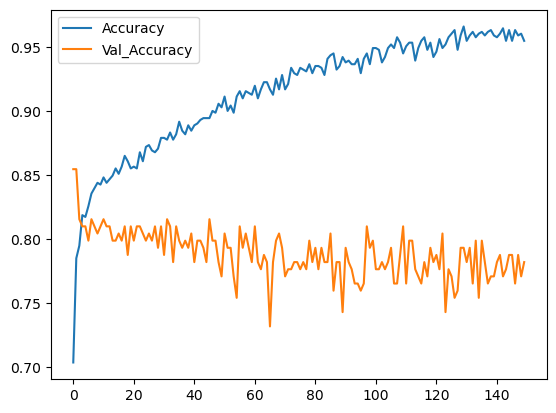

In [52]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [53]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Kaybı: {loss:.4f}")
print(f"Test Doğruluğu: {accuracy:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9059 - loss: 0.4014 
Test Kaybı: 0.4292
Test Doğruluğu: 0.9050


In [54]:
y_pred=model.predict(test).astype(int) 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [55]:
tahminler = y_pred.flatten()

In [56]:
tahminler

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [57]:
predictions_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],  # Test veri setindeki PassengerId'leri kullanıyoruz
    'Survived': tahminler
})

# Sonuçları görüntüleme
predictions_df.head(5)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0


In [58]:
predictions_df.to_csv('predictions.csv', index=False)